<a href="https://colab.research.google.com/github/cdsalazard/Tecnicas_caracterizacion/blob/main/Ancho_grano_espectroscopia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
from scipy.signal import find_peaks,peak_widths


Saving DRX LaBiFe2O6 Solid State.DAT to DRX LaBiFe2O6 Solid State.DAT


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['DRX LaBiFe2O6 Solid State.DAT']),delimiter=' ')

In [ ]:
df

,2t,I
0,15.0021,0.2756
1,15.0281,0.2746
2,15.0541,0.2788
3,15.0801,0.2767
4,15.1061,0.2714
...,...,...
2303,74.8801,0.1109
2304,74.9061,0.1129
2305,74.9321,0.1129
2306,74.9581,0.1116


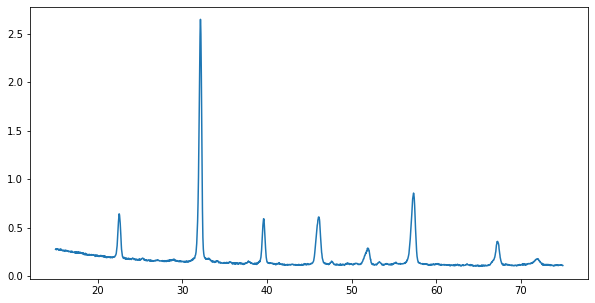

In [ ]:
fig =plt.figure(figsize=(10,5))
plt.plot(df['2t'],df['I'])

#Método de Scherrer
$D=\frac{k\lambda}{\beta cos\theta}\\
k=0.9\\
\lambda=1.54056A \\
\beta=\text{Anchura del pico a la altura media en radianes}
\\
\theta = \text{posicion angular del pico de difracción}$

In [ ]:
k=0.9
l=1.54056

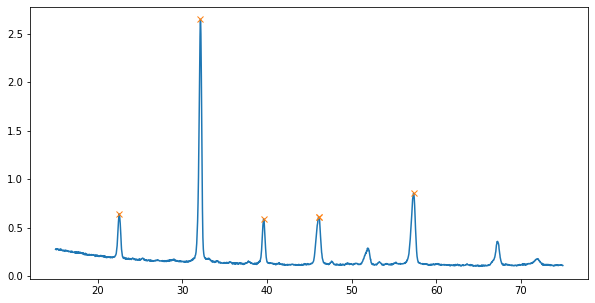

In [ ]:
peaks, _ = find_peaks(df['I'], height=0.5)
fig = plt.figure(figsize=(10,5))
plt.plot(df['2t'],df['I'])
plt.plot(df['2t'][peaks],df['I'][peaks],'x')
theta=df['2t'][peaks[1]] # angulo de pico mas grande en radianes

In [ ]:
half_width = peak_widths(df['I'], peaks, rel_height=0.5)
beta=half_width[0][1]*(max(df['2t'])-min(df['2t']))/len(df['2t'])
 # this was needed because peak width has no info about x axis, so it has an x axis where it corresponds to the amount of points.
beta_height=half_width[1][1]
beta

0.342083977637932

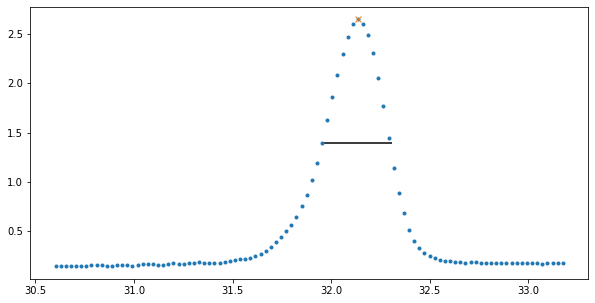

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(df['2t'][600:700],df['I'][600:700],'.')
plt.plot(df['2t'][peaks[1]],df['I'][peaks[1]],'x')
plt.hlines(beta_height,theta-(beta/2),theta+(beta/2))


#Cálculo del tamaño del cristalito

In [ ]:
beta_r=beta*np.pi/180
theta_r=theta*np.pi/180
D=k*l/(beta_r*np.cos(theta_r))*0.1
print('Tamaño de cristalito: %.5f nm'%D)

0.005970491728100569
Tamaño de cristalito: 27.42438 nm


#Densidad de dislocaciones

In [ ]:
1/D**2

0.0013296160503056

# Tension En la Red

In [ ]:
beta_r/(4*np.tan(theta_r))

0.002376117796759655